# AI/LLM for Devs, Week 1 Experiment notebook

This notebook captures a series of experiments to understand and explore working with neural networks.

The initial starting demo was fine-tuning the resnet18 model to recognize bird images, [notebook here](https://colab.research.google.com/drive/11mfy0oWj9IUgZuU3fhcOxV5iwfVEeonK#scrollTo=49pQQPyn4TbA).

## Background

Before warming up to the experiments, confirm your high level understanding of neural networks by answering the following questions below. Write your answers in this notebook.

1. What is the difference between classification and regression?
2. Describe how a feedforward model architecture works, using terms like neurons, input/hidden/output layers, weight/biases, and activation functions.
3. Besides feedforward architectures, what are the other common architectures, and when are they used?
4. Describe how the training loop works using terms like weights, backpropagation (using stochastic gradient descent), loss functions, batches, and epochs.
5. How is fine tuning different from training?
6. What is overfitting, and what are various causes of it?
7. What is the difference between parameters and hyperparameters?
8. What are the most important hyperparameters?

If you have a firm grasp of the concepts above, it covers most of the basics that you'll need later.


## Setup

It's common to store training files in your Google Drive. In order to run the setup code below, you need to copy the training images into a folder called `bird_or_not` in your Google Drive. Download the files [here](https://drive.google.com/drive/folders/1uvs9iDljZHSiP0WuGyAP9j962n8N50Mz?usp=drive_link), then run the cells below.

In [57]:
from google.colab import drive
from pathlib import Path

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Setup

!pip install fastai
!pip install fastbook

from fastbook import *
from fastai.vision.widgets import *

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 130MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.558958,0.114724,0.043478,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.257255,0.041712,0.021739,00:47
1,0.144687,0.021516,0.000000,00:42
2,0.097473,0.014473,0.000000,00:40


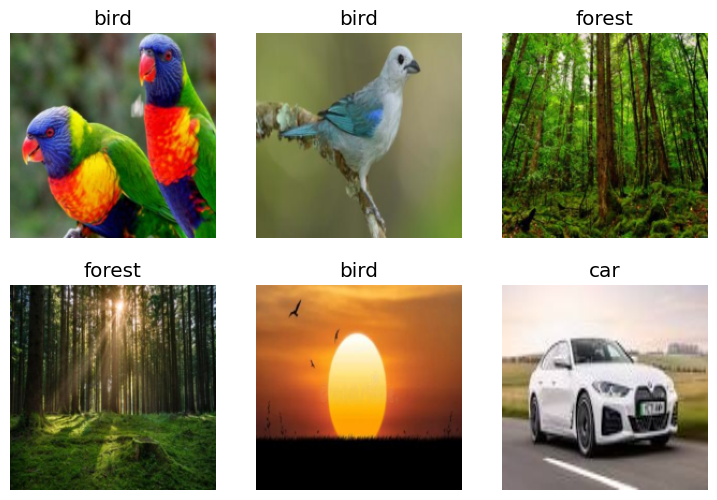

In [7]:
path = Path('/content/drive/My Drive/codepath/week1/bird_or_not')

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

## Experiment #1 - Add an additional class

The initial project has just two classes: birds and forests. Add a third class (e.g., cats or anything else you want), and manually test the classifier by passing in a few selected images of cats, birds, or forests.

epoch,train_loss,valid_loss,error_rate,time
0,1.237291,0.201671,0.106383,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.181593,0.052332,0.021277,00:43
1,0.101535,0.042853,0.021277,00:46
2,0.080426,0.040879,0.021277,00:45


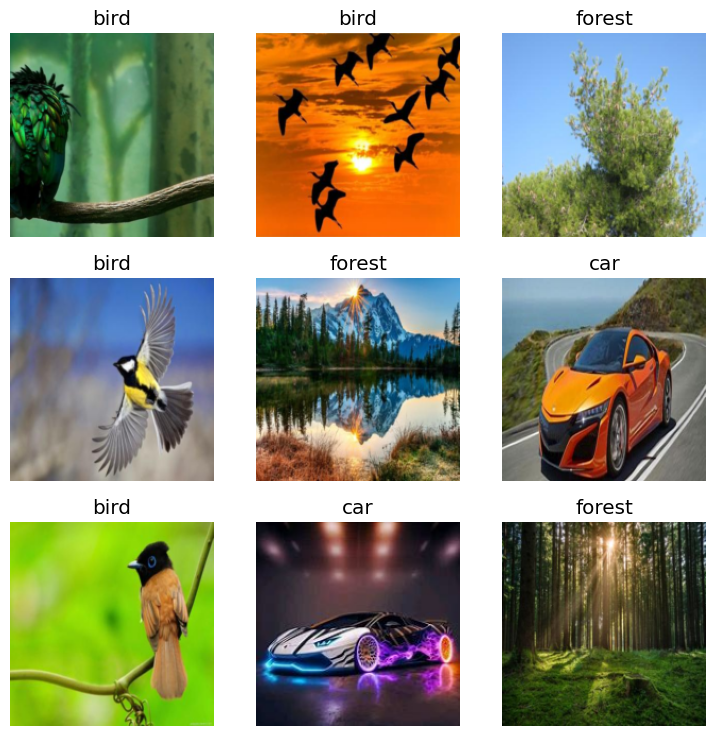

In [34]:
path = Path('/content/drive/My Drive/codepath/week1/bird_or_not')

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

This is a: car.
Probability it's a car: 0.0001


This is a: bird.
Probability it's a bird: 0.9996


This is a: forest.
Probability it's a forest: 0.0085


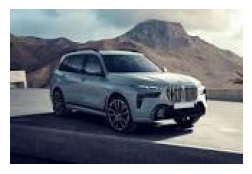

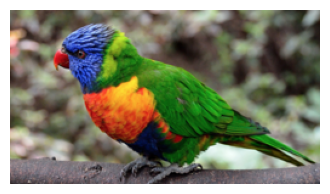

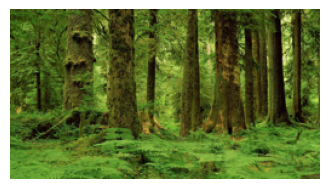

In [35]:
# Verify

car = PILImage.create('/content/drive/My Drive/codepath/week1/car.jpg')
bird = PILImage.create('/content/drive/My Drive/codepath/week1/bird.jpg')
forest = PILImage.create('/content/drive/My Drive/codepath/week1/forest.jpg')
car.thumbnail((256,256))
car.show()
bird.thumbnail((256,256))
bird.show()
forest.thumbnail((256,256))
forest.show()

is_car, _, probs = learn.predict(car)
print(f"This is a: {is_car}.")
print(f"Probability it's a car: {probs[0]:.4f}")

is_bird, _, probs = learn.predict(bird)
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

is_forest, _, probs = learn.predict(forest)
print(f"This is a: {is_forest}.")
print(f"Probability it's a forest: {probs[0]:.4f}")


## Experiment #2 - Use original resnet model

In order to understand what fine-tuning is actually doing, let's take a step back and use the original model.

The original resnet model is trained on millions of images from ImageNet, which it then buckets into 1,000 categories. The full set of categories is over 20k, but resnet only uses a subset for research purposes. Note: this means that the resnet18 model has an output layer that has 1,000 neurons (one for each category).

Look at the demo code below, which uses Pytorch. Experiment with passing in different images, and see which category resnet18 picks. Note: it doesn't pick a single category -- instead, it assigns a probability for each category.



In [36]:
# Experiment #2 code

import torch
from torchvision import models, transforms
from PIL import Image
import requests
import json
import matplotlib.pyplot as plt

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to load an image and apply transformations
def process_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    return batch_t, img  # Return both the tensor and the original image

# Function to get predictions and print human-readable labels
def get_predictions(image_path, class_index_dict):
    tensor, original_img = process_image(image_path)
    with torch.no_grad():
        out = model(tensor)
    probabilities = torch.nn.functional.softmax(out, dim=1)
    top5_prob, top5_catid = torch.topk(probabilities, 5)

    # Print the top 5 human-readable labels with their probabilities
    for i in range(top5_prob.size(1)):
        class_id = str(top5_catid[0][i].item())
        class_name = class_index_dict[class_id][1]  # Access the human-readable class name
        print(f"{class_name}: {top5_prob[0][i].item():.4f}")

    # Visualize the image
    plt.imshow(original_img)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title("Input Image")
    plt.show()

# Download and load the ImageNet class index JSON
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = requests.get(url)
response.raise_for_status()
imagenet_classes = json.loads(response.text)

# Example usage
image_path = get_image_files(path/'bird')[1]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'bird')[10]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'bird')[30]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'forest')[10]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'forest')[18]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'forest')[37]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'car')[6]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'car')[19]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'car')[44]
get_predictions(image_path, imagenet_classes)


Output hidden; open in https://colab.research.google.com to view.

## Experiment #3 - Benchmark accuracy before/after fine-tuning

fast.ai provides a way to run the entire validation set through the model, and you can print the error rate.

Look at the bird classification error before and after fine-tuning. The original resnet18 model had an output layer with 1000 neurons (one for each image category). When we are fine-tuning, we are removing the output layer, and adding a new output layer that only has 2 neurons.

What is the error rate before and after fine-tuning? Why is the error rate so high initially?

In [16]:
# Experiment #3 code

# From the original bird/forest classification: The error rate before fine tuning was 0.043478 and after fine tuning it came down to 0.0000.
# Not fully sure why the error rate was higher initially, it came down maybe because the fine tuning updated few layers of neural network to narrow down the classification(??)

#epoch	train_loss	valid_loss	error_rate	time
# 0	    1.558958	  0.114724	  0.043478	  00:29
#epoch	train_loss	valid_loss	error_rate	time
# 0	    0.257255	  0.041712	  0.021739	  00:47
# 1	    0.144687	  0.021516	  0.000000	  00:42
# 2	    0.097473	  0.014473	  0.000000	  00:40


# After adding a new class "Car", the initial error rate before fine tuning was 0.106383 and after fine tuning it came down to 0.021277.
# Comparing this with the previous fine tuning, and the prediction results(low probably prediction for forest and car), it appears that
# some parameters on the fine tuning could be changed or maybe the training data could be improved or the training data size could be increased(??), not sure.

#epoch	train_loss	valid_loss	error_rate	time
# 0	    1.237291	  0.201671  	0.106383	  00:30
#epoch	train_loss	valid_loss	error_rate	time
# 0	    0.181593	  0.052332  	0.021277	  00:43
# 1	    0.101535	  0.042853  	0.021277  	00:46
# 2	    0.080426  	0.040879  	0.021277  	00:45



## Experiment #4 - Visualize model internals

Image-based models like resnet18 are based on convolution. It is common and sometimes interesting to visualize the various layers. Sometimes, because sometimes it gives people intuition for what's happening inside the model. Sometimes not, because another fact about deep learning is that its ways are mysterious, and we're not sure why models work so well.

Visualize a selection of the layers, especially the layers close to the beginning and close to the end.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/content/drive/My Drive/codepath/week1/bird_or_not/car/new-6.jpg
Showing first 6 layers


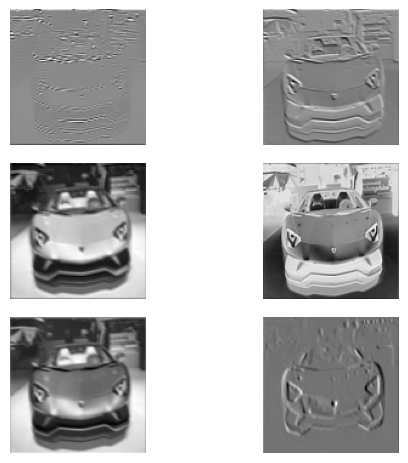

Showing last 6 layers


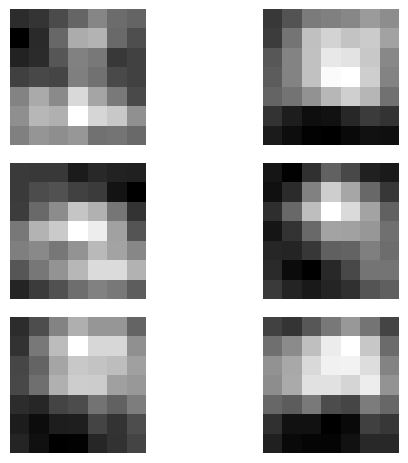

In [74]:
# Experiment #4 code
#!pip install torch torchvision matplotlib

import torch
from torchvision import models, transforms
from matplotlib import pyplot as plt

# Load the pretrained ResNet18 model
model = models.resnet18(pretrained=True).eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to load an image and apply transformations
def process_image(image_path):
    print(image_path)
    img = Image.open(image_path).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    return batch_t, img  # Return both the tensor and the original image

image_path = get_image_files(path/'car')[35]
input_batch, image = process_image(image_path)

outputs = []
def hook(module, input, output):
    outputs.append(output)

# Hook the first and last convolutional layers
model.conv1.register_forward_hook(hook)
model.layer4[1].conv2.register_forward_hook(hook)

# Run
model(input_batch)

def visualizeLayer(tensor, num_images=6, nrow=3):
    fig, axarr = plt.subplots(nrow, num_images//nrow)
    for ax, img in zip(axarr.flatten(), tensor):
        ax.imshow(img.detach().numpy(), cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first layer
first_layer_outputs = outputs[0][0]
visualizeLayer(first_layer_outputs[:6], num_images=6, nrow=3)

# Visualize last layer
last_layer_outputs = outputs[1][0]
visualizeLayer(last_layer_outputs[:6], num_images=6, nrow=3)


## Experiment #5 - Decrease training set size

Decrease the training set size, and plot error rates as a function of number of training images.

Create a large test set (different from your training and validation set). How does the model accuracy for the test set change based on different training set sizes?

In [75]:
# Experiment #5 code
path = Path('/content/drive/My Drive/codepath/week1/bird_or_not')

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

dls1 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

learn = vision_learner(dls1, resnet18, metrics=error_rate)
learn.fine_tune(3)

dls2 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

learn = vision_learner(dls2, resnet18, metrics=error_rate)
learn.fine_tune(3)

dls3 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.4, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

learn = vision_learner(dls3, resnet18, metrics=error_rate)
learn.fine_tune(3)

dls4 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.5, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

learn = vision_learner(dls4, resnet18, metrics=error_rate)
learn.fine_tune(3)

dls5 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.6, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

learn = vision_learner(dls5, resnet18, metrics=error_rate)
learn.fine_tune(3)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,1.480256,0.174897,0.083333,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.248806,0.038755,0.000000,00:50
1,0.182512,0.009973,0.000000,00:44
2,0.122156,0.010071,0.000000,00:43


epoch,train_loss,valid_loss,error_rate,time
0,1.804250,0.401880,0.138889,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.220059,0.166209,0.069444,00:54
1,0.155319,0.079324,0.027778,00:42
2,0.121613,0.055329,0.027778,00:51


epoch,train_loss,valid_loss,error_rate,time
0,1.840284,0.802147,0.312500,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.389287,0.306642,0.145833,00:38
1,0.247151,0.093965,0.041667,00:41
2,0.169655,0.065087,0.031250,00:36


epoch,train_loss,valid_loss,error_rate,time
0,2.115951,0.584931,0.216667,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.440754,0.371082,0.133333,00:32
1,0.334654,0.180928,0.066667,00:34
2,0.242607,0.128808,0.066667,00:31


epoch,train_loss,valid_loss,error_rate,time
0,2.113436,0.696877,0.243056,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.477533,0.317438,0.125000,00:32
1,0.301450,0.174780,0.069444,00:32
2,0.219539,0.139242,0.048611,00:31


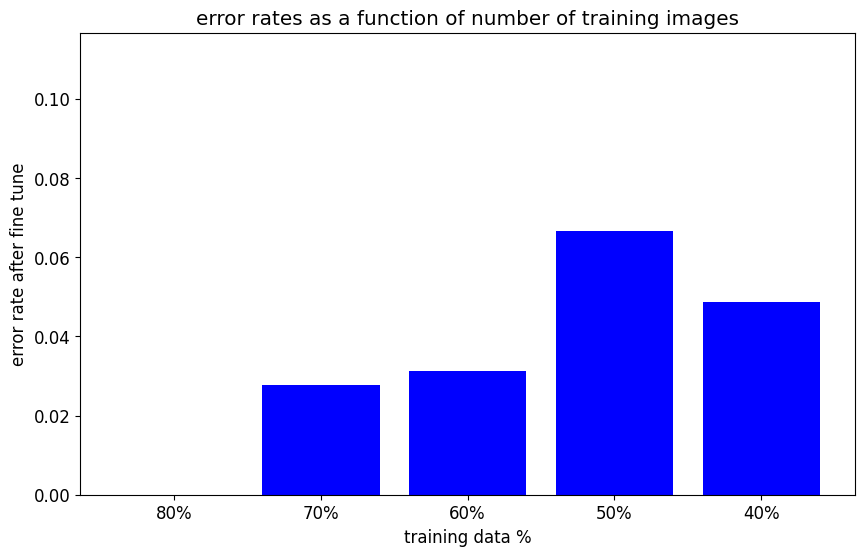

In [76]:
from matplotlib import pyplot as plt

def plot_error_rates():
    # error rates for each of the variations of training size of off the original dataset size
    datasets = {
        "80%": 0.000000,
        "70%": 0.027778,
        "60%": 0.031250,
        "50%": 0.066667,
        "40%": 0.048611
    }


    plt.figure(figsize=(10, 6))
    plt.bar(datasets.keys(), datasets.values(), color='blue')
    plt.xlabel('training data %')
    plt.ylabel('error rate after fine tune')
    plt.title('error rates as a function of number of training images')
    plt.ylim(0, max(datasets.values()) + 0.05) # just more space

    # plot it
    plt.show()


plot_error_rates()


## Experiment #6 - Choose your own experiment

Next week (Week 2), we will do lightning presentations of different experiments. Go back to one of the previous experiments and further expand it, or explore one of the optional experiments below, or investigate an entirely different thing.

Presentations will be between 1-5 minutes (depending on the complexity of your experiment).

The goal is to continue to build our practical intuition, and to leverage the learnings that we'll get hearing what everyone else explored, and what they found out!

In [ ]:
# Experiment #6 code


## Experiment #7 (optional) - Increase number of epochs

Increase the number of epochs.

Create a large test set, can be the same as the prior experiment (different from your training and validation set). How does the model accuracy for the test set change based on different epochs? At what point do you see overfitting?

Decrease the training set size, does that make overfitting happen earlier?

In [ ]:
# Experiment #7 code


## Experiment #8 (optional) - Introduce bad training data

We'll find in this class that quality of training data is one of the biggest factors of model performance, and should be a big focus.

Explore the impact of mislabeling training images, and see when it starts to impact model accuracy.

In [ ]:
# Experiment #8 code


## Experiment #9 - (optional) Classify out-of-distribution images

Try passing in an image of a person, how does your fine-tuned model classify that image?

Try different techniques to better handle out-of-distribution images.

In [ ]:
# Experiment #9 code


## Experiment #10 - (optional) Compare different architectures

Try working with resnet34. How does this larger model perform with the different training set sizes?

In [ ]:
# Experiment #10 code
